In [65]:
import tensorflow as tf
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from gensim.models import KeyedVectors
from data_utils import ml_read_data, ReadOpen
from data_utils import Preprocess, preprocess_test

In [2]:
# 加载GloVe词向量模型
glove_model = KeyedVectors.load_word2vec_format('glove_tt.txt', binary=False)
emoji2vec_model = KeyedVectors.load_word2vec_format('emoji2vec_twitter.bin', binary=True)

In [3]:
X_train_ml, y_train_ml, X_emoji_train_ml, y_emoji_train_ml = ml_read_data("dataset/train_sentence.csv", "dataset/train_label.csv", glove_model, emoji2vec_model)
X_test_ml, y_test_ml, X_emoji_test_ml, y_emoji_test_ml = ml_read_data("dataset/test_sentence.csv", "dataset/test_label.csv", glove_model, emoji2vec_model)
X_subtest_ml, y_subtest_ml, X_emoji_subtest_ml, y_emoji_subtest_ml = ml_read_data("dataset/subtest_sentence.csv", "dataset/subtest_label.csv", glove_model, emoji2vec_model)

## SVM

In [4]:
svm_model = joblib.load('baseline_models/svm_model.pkl')
svm_model_we = joblib.load('baseline_models/svm_model_we.pkl')


In [5]:
svm_y_pred = svm_model.predict(X_test_ml).astype(int)
svm_y_emoji_pred = svm_model_we.predict(X_emoji_test_ml).astype(int)
svm_y_sub_pred = svm_model.predict(X_subtest_ml).astype(int)
svm_y_sub_emoji_pred = svm_model_we.predict(X_emoji_subtest_ml).astype(int)

In [6]:
# 使用模型进行预测
svm_accuracy = accuracy_score(y_test_ml, svm_y_pred)
svm_accuracy_emoji = accuracy_score(y_test_ml, svm_y_emoji_pred)
svm_accuracy_sub = accuracy_score(y_subtest_ml, svm_y_sub_pred)
svm_accuracy_sub_emoji = accuracy_score(y_subtest_ml, svm_y_sub_emoji_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM Accuracy_emoji:", svm_accuracy_emoji)
print("SVM Accuracy_sub:", svm_accuracy_sub)
print("SVM Accuracy_sub_emoji:", svm_accuracy_sub_emoji)

SVM Accuracy: 0.769
SVM Accuracy_emoji: 0.763
SVM Accuracy_sub: 0.8129496402877698
SVM Accuracy_sub_emoji: 0.8237410071942446


In [7]:
svm_f1 = f1_score(y_test_ml, svm_y_pred)
svm_f1_emoji = f1_score(y_test_ml, svm_y_emoji_pred)
svm_f1_sub = f1_score(y_subtest_ml, svm_y_sub_pred)
svm_f1_sub_emoji = f1_score(y_subtest_ml, svm_y_sub_emoji_pred)
print("SVM F1 Score:", svm_f1)
print("SVM F1 Score_emoji:", svm_f1_emoji)
print("SVM F1 Score_sub:", svm_f1_sub)
print("SVM F1 Score_sub_emoji:", svm_f1_sub_emoji)

SVM F1 Score: 0.772189349112426
SVM F1 Score_emoji: 0.7662721893491123
SVM F1 Score_sub: 0.8522727272727274
SVM F1 Score_sub_emoji: 0.8528528528528528


## DecisionTree

In [8]:
dt_classifier = joblib.load('baseline_models/dt_classifier.pkl')
dt_classifier_we = joblib.load('baseline_models/dt_classifier_we.pkl')

In [9]:
dt_y_pred = dt_classifier.predict(X_test_ml).astype(int)
dt_y_emoji_pred = dt_classifier_we.predict(X_emoji_test_ml).astype(int)
dt_y_sub_pred = dt_classifier.predict(X_subtest_ml).astype(int)
dt_y_sub_emoji_pred = dt_classifier_we.predict(X_emoji_subtest_ml).astype(int)

In [10]:
dt_accuracy = accuracy_score(y_test_ml, dt_y_pred)
dt_accuracy_emoji = accuracy_score(y_test_ml, dt_y_emoji_pred)
dt_accuracy_sub = accuracy_score(y_subtest_ml, dt_y_sub_pred)
dt_accuracy_sub_emoji = accuracy_score(y_subtest_ml, dt_y_sub_emoji_pred)
print("DecisionTree Accuracy:", dt_accuracy)
print("DecisionTree Accuracy_emoji:", dt_accuracy_emoji)
print("DecisionTree Accuracy_sub:", dt_accuracy_sub)
print("DecisionTree Accuracy_sub_emoji:", dt_accuracy_sub_emoji)

DecisionTree Accuracy: 0.7265
DecisionTree Accuracy_emoji: 0.7295
DecisionTree Accuracy_sub: 0.7769784172661871
DecisionTree Accuracy_sub_emoji: 0.7985611510791367


In [11]:
dt_f1 = f1_score(y_test_ml, dt_y_pred)
dt_f1_emoji = f1_score(y_test_ml, dt_y_emoji_pred)
dt_f1_sub = f1_score(y_subtest_ml, dt_y_sub_pred)
dt_f1_sub_emoji = f1_score(y_subtest_ml, dt_y_sub_emoji_pred)
print("DecisionTree F1 Score:", dt_f1)
print("DecisionTree F1 Score_emoji:", dt_f1_emoji)
print("DecisionTree F1 Score_sub:", dt_f1_sub)
print("DecisionTree F1 Score_sub_emoji:", dt_f1_sub_emoji)

DecisionTree F1 Score: 0.7556945064761054
DecisionTree F1 Score_emoji: 0.7566351776878093
DecisionTree F1 Score_sub: 0.8342245989304812
DecisionTree F1 Score_sub_emoji: 0.8461538461538463


## RandomForest

In [12]:
rf_classifier = joblib.load('baseline_models/rf_classifier.pkl')
rf_classifier_we = joblib.load('baseline_models/rf_classifier_we.pkl')

In [13]:
rf_y_pred = rf_classifier.predict(X_test_ml).astype(int)
rf_y_emoji_pred = rf_classifier_we.predict(X_emoji_test_ml).astype(int)
rf_y_sub_pred = rf_classifier.predict(X_subtest_ml).astype(int)
rf_y_sub_emoji_pred = rf_classifier_we.predict(X_emoji_subtest_ml).astype(int)

In [14]:
rf_accuracy = accuracy_score(y_test_ml, rf_y_pred)
rf_accuracy_emoji = accuracy_score(y_test_ml, rf_y_emoji_pred)
rf_accuracy_sub = accuracy_score(y_subtest_ml, rf_y_sub_pred)
rf_accuracy_sub_emoji = accuracy_score(y_subtest_ml, rf_y_sub_emoji_pred)
print("RandomForest Accuracy:", rf_accuracy)
print("RandomForest Accuracy_emoji:", rf_accuracy_emoji)
print("RandomForest Accuracy_sub:", rf_accuracy_sub)
print("RandomForest Accuracy_sub_emoji:", rf_accuracy_sub_emoji)

RandomForest Accuracy: 0.8145
RandomForest Accuracy_emoji: 0.818
RandomForest Accuracy_sub: 0.8057553956834532
RandomForest Accuracy_sub_emoji: 0.8525179856115108


In [15]:
rf_f1 = f1_score(y_test_ml, rf_y_pred)
rf_f1_emoji = f1_score(y_test_ml, rf_y_emoji_pred)
rf_f1_sub = f1_score(y_subtest_ml, rf_y_sub_pred)
rf_f1_sub_emoji = f1_score(y_subtest_ml, rf_y_sub_emoji_pred)
print("RandomForest F1 Score:", rf_f1)
print("RandomForest F1 Score_emoji:", rf_f1_emoji)
print("RandomForest F1 Score_sub:", rf_f1_sub)
print("RandomForest F1 Score_sub_emoji:", rf_f1_sub_emoji)

RandomForest F1 Score: 0.8232491662696524
RandomForest F1 Score_emoji: 0.8255033557046979
RandomForest F1 Score_sub: 0.8524590163934426
RandomForest F1 Score_sub_emoji: 0.8838526912181304


## GradientBoosting

In [16]:
gbt_classifier = joblib.load('baseline_models/gbt_classifier.pkl')
gbt_classifier_we = joblib.load('baseline_models/gbt_classifier_we.pkl')

In [17]:
gbt_y_pred = gbt_classifier.predict(X_test_ml).astype(int)
gbt_y_emoji_pred = gbt_classifier_we.predict(X_emoji_test_ml).astype(int)
gbt_y_sub_pred = gbt_classifier.predict(X_subtest_ml).astype(int)
gbt_y_sub_emoji_pred = gbt_classifier_we.predict(X_emoji_subtest_ml).astype(int)

In [18]:
gbt_accuracy = accuracy_score(y_test_ml, gbt_y_pred)
gbt_accuracy_emoji = accuracy_score(y_test_ml, gbt_y_emoji_pred)
gbt_accuracy_sub = accuracy_score(y_subtest_ml, gbt_y_sub_pred)
gbt_accuracy_sub_emoji = accuracy_score(y_subtest_ml, gbt_y_sub_emoji_pred)
print("GradientBoosting Accuracy:", gbt_accuracy)
print("GradientBoosting Accuracy_emoji:", gbt_accuracy_emoji)
print("GradientBoosting Accuracy_sub:", gbt_accuracy_sub)
print("GradientBoosting Accuracy_sub_emoji:", gbt_accuracy_sub_emoji)

Accuracy: 0.746
Accuracy_emoji: 0.7475
Accuracy_sub: 0.7949640287769785
Accuracy_sub_emoji: 0.7949640287769785


In [19]:
gbt_f1 = f1_score(y_test_ml, gbt_y_pred)
gbt_f1_emoji = f1_score(y_test_ml, gbt_y_emoji_pred)
gbt_f1_sub = f1_score(y_subtest_ml, gbt_y_sub_pred)
gbt_f1_sub_emoji = f1_score(y_subtest_ml, gbt_y_sub_emoji_pred)
print("GradientBoosting F1 Score:", gbt_f1)
print("GradientBoosting F1 Score_emoji:", gbt_f1_emoji)
print("GradientBoosting F1 Score_sub:", gbt_f1_sub)
print("GradientBoosting F1 Score_sub_emoji:", gbt_f1_sub_emoji)

GradientBoosting F1 Score: 0.75146771037182
GradientBoosting F1 Score_emoji: 0.7528144884973079
GradientBoosting F1 Score_sub: 0.8376068376068376
GradientBoosting F1 Score_sub_emoji: 0.8357348703170029


## Bi-LSTM+ATT

In [20]:
filename_train = "dataset/train_sentence.csv"
Labelfile_train = "dataset/train_label.csv"
filename_test = "dataset/test_sentence.csv"
Labelfile_test = "dataset/test_label.csv"
filename_subtest = "dataset/subtest_sentence.csv"
Labelfile_subtest = "dataset/subtest_label.csv"
print('Reading data...')
data_train, labels_train, count_train = ReadOpen(filename_train, Labelfile_train)
data_test, labels_test, count_test = ReadOpen(filename_test, Labelfile_test)
data_subtest, labels_subtest, count_subtest = ReadOpen(filename_subtest, Labelfile_subtest)
print('Getting Embeddings...')
get_emoji2vec = True
padded_docs_train, embedding_matrix, l, t = Preprocess(data_train, count_train, glove_model, emoji2vec_model, get_emoji2vec=get_emoji2vec)
padded_docs_test = preprocess_test(t, l, data_test)
padded_docs_subtest = preprocess_test(t, l, data_subtest)
print('Successfully loaded and processed the data!')
X_subtest = padded_docs_subtest
y_subtest = labels_subtest
X_train = padded_docs_train
X_test = padded_docs_test
y_train = labels_train
y_test = labels_test

Reading data...
Getting Embeddings...
Loaded 1193515 word vectors.
0 words not found in vocabulary
Loaded 1193515 word vectors.
0 words not found in vocabulary


In [21]:
model_w = tf.keras.models.load_model("model/best_model_w_0.8634999990463257_sub_0.866906464099884")
model_we = tf.keras.models.load_model("model/best_model_we_0.8734999895095825_sub_0.8920863270759583")

In [23]:
loss, accuracy_w = model_w.evaluate(X_test, y_test, verbose=1)
loss, sub_accuracy_w = model_w.evaluate(X_subtest, y_subtest, verbose=1)

loss, accuracy_we = model_we.evaluate(X_test, y_test, verbose=1)
loss, sub_accuracy_we = model_we.evaluate(X_subtest, y_subtest, verbose=1)

9/9 [==============================] - 0s 14ms/step - loss: 0.2852 - acc: 0.8921


In [24]:
print("Bi-LSTM+ATT_w Accuracy:", accuracy_w)
print("Bi-LSTM+ATT_w Accuracy_sub:", sub_accuracy_w)
print("Bi-LSTM+ATT_we Accuracy:", accuracy_we)
print("Bi-LSTM+ATT_we Accuracy_sub:", sub_accuracy_we)

Bi-LSTM+ATT_w Accuracy: 0.8634999990463257
Bi-LSTM+ATT_w Accuracy_sub: 0.866906464099884
Bi-LSTM+ATT_we Accuracy: 0.8734999895095825
Bi-LSTM+ATT_we Accuracy_sub: 0.8920863270759583


In [25]:
y_pred_w = (model_w.predict(X_test) > 0.5).astype(int)
y_pred_we = (model_we.predict(X_test) > 0.5).astype(int)
sub_y_pred_w = (model_w.predict(X_subtest) > 0.5).astype(int)
sub_y_pred_we = (model_we.predict(X_subtest) > 0.5).astype(int)
f1_w = f1_score(y_test, y_pred_w)
f1_we = f1_score(y_test, y_pred_we)
sub_f1_w = f1_score(y_subtest, sub_y_pred_w)
sub_f1_we = f1_score(y_subtest, sub_y_pred_we)

In [26]:
print("Bi-LSTM+ATT_w F1 Score:", f1_w)
print("Bi-LSTM+ATT_we F1 Score:", f1_we)
print("Bi-LSTM+ATT_w F1 Score_sub:", sub_f1_w)
print("Bi-LSTM+ATT_we F1 Score_sub:", sub_f1_we)

Bi-LSTM+ATT_w F1 Score: 0.8655834564254061
Bi-LSTM+ATT_we F1 Score: 0.8685714285714285
Bi-LSTM+ATT_w F1 Score_sub: 0.8939828080229226
Bi-LSTM+ATT_we F1 Score_sub: 0.9107142857142858


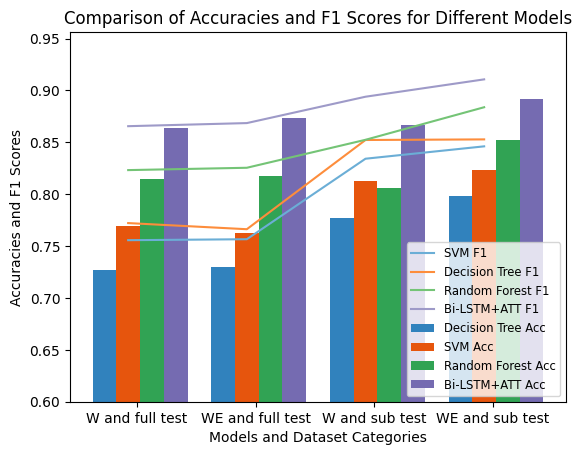

In [107]:
import matplotlib.pyplot as plt

# 准确率数据
dt_accuracies_list = [dt_accuracy, dt_accuracy_emoji, dt_accuracy_sub, dt_accuracy_sub_emoji]
svm_accuracies_list = [svm_accuracy, svm_accuracy_emoji, svm_accuracy_sub, svm_accuracy_sub_emoji]
rf_accuracies_list = [rf_accuracy, rf_accuracy_emoji, rf_accuracy_sub, rf_accuracy_sub_emoji]
dl_accuracies_list = [accuracy_w, accuracy_we, sub_accuracy_w, sub_accuracy_we]

dt_f1_list = [dt_f1, dt_f1_emoji, dt_f1_sub, dt_f1_sub_emoji]
svm_f1_list = [svm_f1, svm_f1_emoji, svm_f1_sub, svm_f1_sub_emoji]
rf_f1_list = [rf_f1, rf_f1_emoji, rf_f1_sub, rf_f1_sub_emoji]
dl_f1_list = [f1_w, f1_we, sub_f1_w, sub_f1_we]

# 类别标签
categories = ['W and full test', 'WE and full test', 'W and sub test', 'WE and sub test']

# 设置柱状图的宽度
bar_width = 0.15
bar_spacing = 0.05

# 设置每组模型的位置
index = [0, bar_width, 2 * bar_width, 3 * bar_width, 4 * bar_width]
x=np.arange(4)#柱状图在横坐标上的位置
# 绘制柱状图
model_labels_acc = ['Decision Tree Acc', 'SVM Acc', 'Random Forest Acc', 'Bi-LSTM+ATT Acc']
model_labels_f1 = ['SVM F1', 'Decision Tree F1', 'Random Forest F1', 'Bi-LSTM+ATT F1']
colors = plt.get_cmap('tab20c')
bar_colors = [colors(0), colors(4), colors(8), colors(12)]
plot_colors = [colors(1), colors(5), colors(9), colors(13)]

x = np.arange(len(model_labels_acc))  # x轴刻度标签位置
width = 0.2  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中

plt.bar(x - 1.5*width, dt_accuracies_list, width, label=model_labels_acc[0], color=bar_colors[0])
plt.bar(x - 0.5*width, svm_accuracies_list, width, label=model_labels_acc[1], color=bar_colors[1])
plt.bar(x + 0.5*width, rf_accuracies_list, width, label=model_labels_acc[2], color=bar_colors[2])
plt.bar(x + 1.5*width, dl_accuracies_list, width, label=model_labels_acc[3], color=bar_colors[3])

plt.plot(x-0.5*width, dt_f1_list, label=model_labels_f1[0], color=plot_colors[0])
plt.plot(x - 0.5*width, svm_f1_list, label=model_labels_f1[1], color=plot_colors[1])
plt.plot(x - 0.5*width, rf_f1_list, label=model_labels_f1[2], color=plot_colors[2])
plt.plot(x - 0.5*width, dl_f1_list, label=model_labels_f1[3], color=plot_colors[3])

# 设置x轴标签
plt.xlabel('Models and Dataset Categories')
# 设置y轴标签
plt.ylim(0.6)
plt.ylabel('Accuracies and F1 Scores')
# 设置图标题
plt.title('Comparison of Accuracies and F1 Scores for Different Models')
# 设置x轴刻度标签
plt.xticks(x+bar_width/2 - 0.1,categories)
# 添加图例
plt.legend(loc='lower right', fontsize='small')

# 展示图形
plt.show()

In [99]:
labels = ['svm', 'dt', 'rf']
metrics = [accuracy_score, f1_score, recall_score, precision_score]
metrics_names = ["accuracy_score", "f1_score", "recall_score", "precision_score"]

In [110]:
for label in labels:
    print(f"\n{label}: ")
    globals()[f"{label}_list"] = []
    for metric, metrics_name in zip(metrics, metrics_names):
        globals()[f"{label}_{metrics_name}"] = metric(y_test_ml, globals()[f"{label}_y_pred"])
        globals()[f"{label}_{metrics_name}_emoji"] = metric(y_test_ml, globals()[f"{label}_y_emoji_pred"])
        globals()[f"{label}_{metrics_name}_sub"] = metric(y_subtest_ml, globals()[f"{label}_y_sub_pred"])
        globals()[f"{label}_{metrics_name}_sub_emoji"] = metric(y_subtest_ml, globals()[f"{label}_y_sub_emoji_pred"])

        globals()[f"{label}_{metrics_name}_list"] = [globals()[f"{label}_{metrics_name}"],globals()[f"{label}_{metrics_name}_emoji"],globals()[f"{label}_{metrics_name}_sub"], globals()[f"{label}_{metrics_name}_sub_emoji"]]
        globals()[f"{label}_list"].append(globals()[f"{label}_{metrics_name}_list"])
        print(f"{label}_{metrics_name}_list: ", globals()[f"{label}_{metrics_name}_list"])
    print(f"{label}_list: ", globals()[f"{label}_list"])


svm: 
svm_accuracy_score_list:  [0.769, 0.763, 0.8129496402877698, 0.8237410071942446]
svm_f1_score_list:  [0.772189349112426, 0.7662721893491123, 0.8522727272727274, 0.8528528528528528]
svm_recall_score_list:  [0.783, 0.777, 0.872093023255814, 0.8255813953488372]
svm_precision_score_list:  [0.7616731517509727, 0.7558365758754864, 0.8333333333333334, 0.8819875776397516]
svm_list:  [[0.769, 0.763, 0.8129496402877698, 0.8237410071942446], [0.772189349112426, 0.7662721893491123, 0.8522727272727274, 0.8528528528528528], [0.783, 0.777, 0.872093023255814, 0.8255813953488372], [0.7616731517509727, 0.7558365758754864, 0.8333333333333334, 0.8819875776397516]]

dt: 
dt_accuracy_score_list:  [0.7265, 0.7295, 0.7769784172661871, 0.7985611510791367]
dt_f1_score_list:  [0.7556945064761054, 0.7566351776878093, 0.8342245989304812, 0.8461538461538463]
dt_recall_score_list:  [0.846, 0.841, 0.9069767441860465, 0.8953488372093024]
dt_precision_score_list:  [0.6828087167070218, 0.687653311529027, 0.772277

In [148]:
svm_list = [[0.769, 0.763, 0.8129496402877698, 0.8237410071942446],[0.772189349112426, 0.7662721893491123, 0.8522727272727274, 0.8528528528528528],[0.783, 0.777, 0.872093023255814, 0.8255813953488372],[0.7616731517509727, 0.7558365758754864, 0.8333333333333334, 0.8819875776397516]]

dt_list = [[0.7265, 0.7295, 0.7769784172661871, 0.7985611510791367],[0.7556945064761054, 0.7566351776878093, 0.8342245989304812, 0.8461538461538463],[0.846, 0.841, 0.9069767441860465, 0.8953488372093024],[0.6828087167070218, 0.687653311529027, 0.7722772277227723, 0.8020833333333334]]

rf_list = [[0.8145, 0.818, 0.8057553956834532, 0.8525179856115108],[0.8232491662696524, 0.8255033557046979, 0.8524590163934426, 0.8838526912181304],[0.864, 0.861, 0.9069767441860465, 0.9069767441860465],[0.7861692447679709, 0.7928176795580111, 0.8041237113402062, 0.861878453038674]]

dl_list = [[0.8635, 0.8735, 0.8669064748201439, 0.8920863309352518],[0.8655834564254061, 0.8685714285714285, 0.8939828080229226, 0.9107142857142858],[0.879, 0.836, 0.9069767441860465, 0.8895348837209303],[0.8525703200775946, 0.9037837837837838, 0.8813559322033898, 0.9329268292682927]]

In [149]:
def multiply_and_round(data):
    result = []
    for row in data:
        new_row = [format(element * 100, '.2f') for element in row]
        result.append(new_row)
    return result

svm_list = multiply_and_round(svm_list)
dt_list = multiply_and_round(dt_list)
rf_list = multiply_and_round(rf_list)
dl_list = multiply_and_round(dl_list)

print(svm_list)
print(dt_list)
print(rf_list)
print(dl_list)

[[76.9, 76.3, 81.29, 82.37], [77.22, 76.63, 85.23, 85.29], [78.3, 77.7, 87.21, 82.56], [76.17, 75.58, 83.33, 88.2]]
[[72.65, 72.95, 77.7, 79.86], [75.57, 75.66, 83.42, 84.62], [84.6, 84.1, 90.7, 89.53], [68.28, 68.77, 77.23, 80.21]]
[[81.45, 81.8, 80.58, 85.25], [82.32, 82.55, 85.25, 88.39], [86.4, 86.1, 90.7, 90.7], [78.62, 79.28, 80.41, 86.19]]
[[86.35, 87.35, 86.69, 89.21], [86.56, 86.86, 89.4, 91.07], [87.9, 83.6, 90.7, 88.95], [85.26, 90.38, 88.14, 93.29]]


In [152]:
import csv

filename = 'metrics_data.csv'

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Metrics names','Model', 'Single-modal', 'Multi-modal', 'Single-modal in sub test', 'Multi-modal in sub test'])  # 写入标题行
    for i, metrics_name in zip(range(len(svm_list)), metrics_names):
        svm_row = [metrics_name] + ['SVM'] + svm_list[i]
        dt_row = [metrics_name] + ['DT'] + dt_list[i]
        rf_row = [metrics_name] + ['RF'] + rf_list[i]
        dl_row = [metrics_name] + ['DL'] + dl_list[i]
        writer.writerow(svm_row)
        writer.writerow(dt_row)
        writer.writerow(rf_row)
        writer.writerow(dl_row)
